<a href="https://colab.research.google.com/github/saunak8839/Bangla_Paper_Model/blob/master/BanglaLekha_Batch_Normalisation_LSTM_Dropout_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip drive/MyDrive/BanglaLekha-Isolated> /dev/null

In [5]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 9.1 MB/s eta 0:00:00


In [6]:
!pip install tensorflow-addons --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import os
import cv2
from PIL import ImageFile,Image
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D, MaxPooling2D, Reshape, LSTM
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [8]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import splitfolders

In [10]:
splitfolders.ratio("/content/BanglaLekha-Isolated/Images", output="BanglaLekha_dataset",
    seed=1337, ratio=(.7,.1,.2), group_prefix=None, move=False)

Copying files: 98950 files [00:14, 7028.86 files/s]


In [14]:
classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1,1), padding = "same", input_shape = (28, 28, 1)))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1,1), padding = "same"))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), strides = (1,1), padding = "same"))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
classifier.add(Dropout(.2))

classifier.add(Reshape((3,3*128),input_shape=(3,3,128)))
classifier.add(LSTM(128, return_sequences=True))

classifier.add(Flatten())

classifier.add(Dense(units = 128))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(Dropout(.2))

classifier.add(Dense(units = 64))
classifier.add(tf.keras.layers.LeakyReLU(alpha=0.1))
classifier.add(Dropout(.2))

classifier.add(Dense(units = 50, activation = 'softmax'))

opt=tf.keras.optimizers.Adadelta(learning_rate=0.1, rho=0.95)              
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)       

In [16]:
train_folder = "/content/BanglaLekha_dataset/train"
val_folder = "/content/BanglaLekha_dataset/val"
test_folder = "/content/BanglaLekha_dataset/test"

In [17]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [18]:
Image.LOAD_TRUNCATED_IMAGES = True


train_datagen = ImageDataGenerator(shear_range = .2, rotation_range = 25)
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_set = train_datagen.flow_from_directory(train_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")
val_set = val_datagen.flow_from_directory(val_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")
test_set = test_datagen.flow_from_directory(test_folder, target_size = (28, 28), 
                                                 batch_size = 32, class_mode = 'categorical',color_mode="grayscale")

Found 69244 images belonging to 50 classes.
Found 9877 images belonging to 50 classes.
Found 19829 images belonging to 50 classes.


In [19]:
history=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 50,
                        validation_data = val_set, validation_steps = len(val_set))
classifier.save_weights('train_weights1.h5')

Epoch 1/50
2164/2164 [==============================] - 79s 30ms/step - loss: 3.1609 - accuracy: 0.1570 - val_loss: 1.9730 - val_accuracy: 0.4445
Epoch 2/50
2164/2164 [==============================] - 61s 28ms/step - loss: 2.0534 - accuracy: 0.3953 - val_loss: 1.1989 - val_accuracy: 0.6713
Epoch 3/50
2164/2164 [==============================] - 62s 29ms/step - loss: 1.5441 - accuracy: 0.5338 - val_loss: 0.9036 - val_accuracy: 0.7506
Epoch 4/50
2164/2164 [==============================] - 62s 29ms/step - loss: 1.2623 - accuracy: 0.6198 - val_loss: 0.7701 - val_accuracy: 0.7748
Epoch 5/50
2164/2164 [==============================] - 65s 30ms/step - loss: 1.0906 - accuracy: 0.6719 - val_loss: 0.6440 - val_accuracy: 0.8173
Epoch 6/50
2164/2164 [==============================] - 63s 29ms/step - loss: 0.9730 - accuracy: 0.7099 - val_loss: 0.6023 - val_accuracy: 0.8285
Epoch 7/50
2164/2164 [==============================] - 65s 30ms/step - loss: 0.8856 - accuracy: 0.7392 - val_loss: 0.5631 -

In [20]:
classifier.evaluate(test_set)

620/620 [==============================] - 10s 17ms/step - loss: 0.2765 - accuracy: 0.9257


[0.27653440833091736, 0.9256644248962402]

In [ ]:
from tensorflow.keras import regularizers

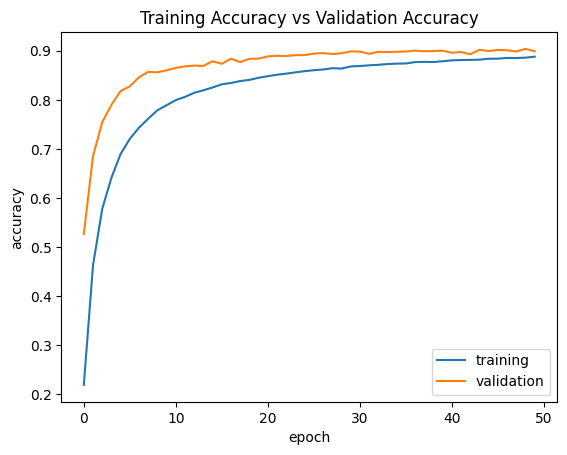

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

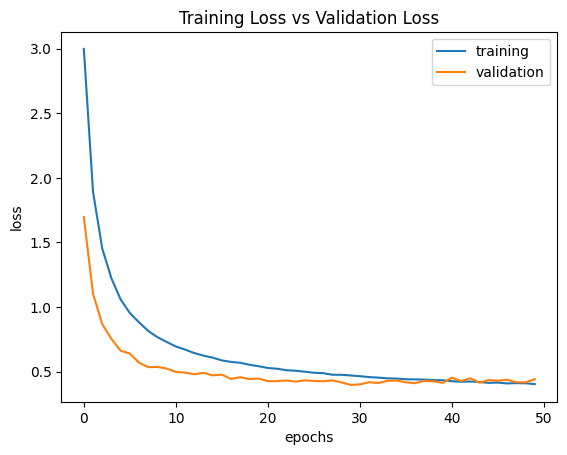

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [26]:
classifier.load_weights('train_weights3.h5')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
history3=classifier.fit(train_set, steps_per_epoch = len(train_set), epochs = 30,
                        validation_data = val_set, validation_steps = len(val_set),callbacks=[reduce_lr])
classifier.save_weights('train_weights4.h5')

Epoch 1/30
2164/2164 [==============================] - 68s 31ms/step - loss: 0.2819 - accuracy: 0.9192 - val_loss: 0.3880 - val_accuracy: 0.9166 - lr: 0.1000
Epoch 2/30
2164/2164 [==============================] - 63s 29ms/step - loss: 0.2813 - accuracy: 0.9200 - val_loss: 0.3869 - val_accuracy: 0.9174 - lr: 0.1000
Epoch 3/30
2164/2164 [==============================] - 64s 30ms/step - loss: 0.2822 - accuracy: 0.9192 - val_loss: 0.3781 - val_accuracy: 0.9167 - lr: 0.1000
Epoch 4/30
2164/2164 [==============================] - 64s 30ms/step - loss: 0.2831 - accuracy: 0.9190 - val_loss: 0.3838 - val_accuracy: 0.9141 - lr: 0.1000
Epoch 5/30
2164/2164 [==============================] - 64s 29ms/step - loss: 0.2813 - accuracy: 0.9187 - val_loss: 0.3824 - val_accuracy: 0.9151 - lr: 0.1000
Epoch 6/30
2164/2164 [==============================] - 64s 30ms/step - loss: 0.2805 - accuracy: 0.9206 - val_loss: 0.3806 - val_accuracy: 0.9161 - lr: 0.1000
Epoch 7/30
2164/2164 [========================

In [27]:
classifier.evaluate(test_set)

620/620 [==============================] - 11s 17ms/step - loss: 0.2989 - accuracy: 0.9323


[0.29885756969451904, 0.9323213696479797]

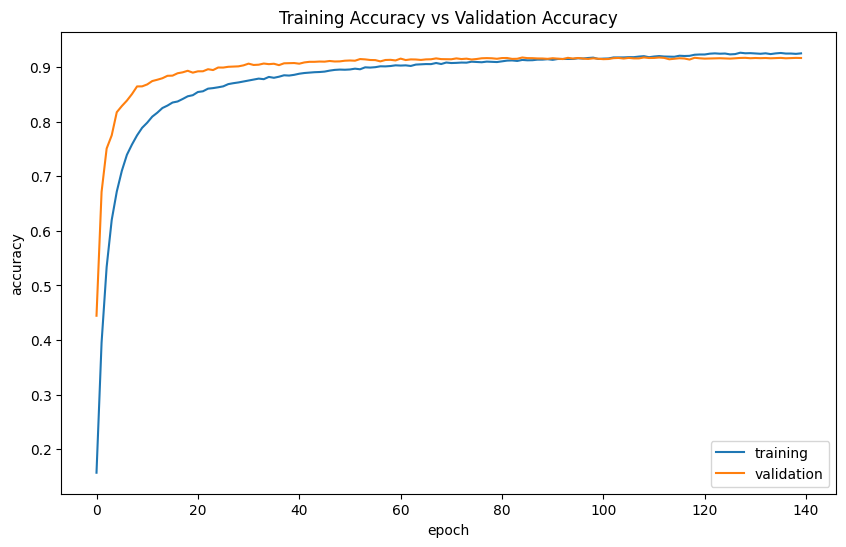

In [29]:
from matplotlib import pyplot as plt

combined_accuracy = []
combined_val_accuracy = []

# Combine the data from all history variables
for history in [history, history1, history2, history3]:
    combined_accuracy += history.history['accuracy']
    combined_val_accuracy += history.history['val_accuracy']

plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Plotting the combined accuracy
plt.plot(combined_accuracy)

# Plotting the combined validation accuracy
plt.plot(combined_val_accuracy)

# Add labels and legend
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')

plt.show()
